# *Depreciated, expect us to come up with other examples that allows this*

## Minimal Example on merging LoRA with LoRA, and applying it to single model.

This notebook demonstrates how to merge two LoRA models, and apply the merged model to a single model.
i.e.,

$$
W \leftarrow W + (A_1 \alpha + A_2 \beta)(B_1 \alpha + B_2 \beta)^T
$$

/home/zhang/anaconda3/envs/py39/lib/python3.9/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


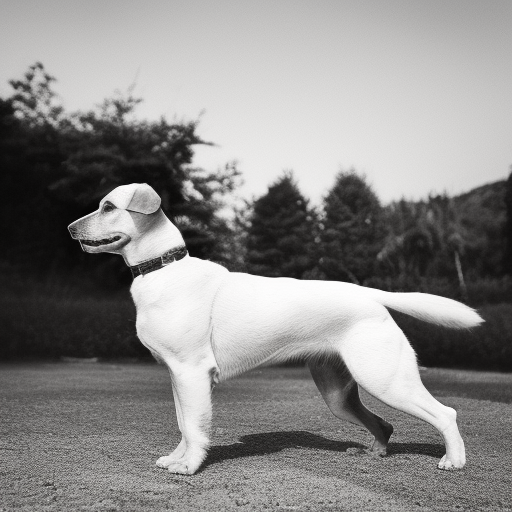

In [1]:
from diffusers import StableDiffusionPipeline, EulerAncestralDiscreteScheduler
import torch

model_id = "stabilityai/stable-diffusion-2-1-base"

pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to(
    "cuda:1"
)
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)

prompt = "a dog."
torch.manual_seed(0)
image = pipe(prompt, num_inference_steps=30, guidance_scale=7).images[0]

image

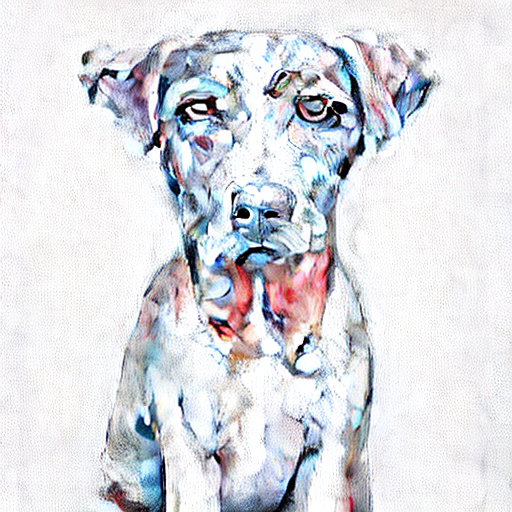

In [2]:
from lora_diffusion import monkeypatch_or_replace_lora, tune_lora_scale, monkeypatch_add_lora


monkeypatch_or_replace_lora(pipe.unet, torch.load("../training_scripts/art_painting/lora_weight_e2624_s10500.pt"))
# monkeypatch_lora(pipe.text_encoder, torch.load("../lora_kiriko.text_encoder.pt"), target_replace_module=["CLIPAttention"])
tune_lora_scale(pipe.unet, 1.00)

torch.manual_seed(0)
image = pipe(prompt, num_inference_steps=30, guidance_scale=7).images[0]
image.save("../contents/lora_with_clip.jpg")
image # Clearly overfitting.

  0%|          | 0/30 [00:00<?, ?it/s]

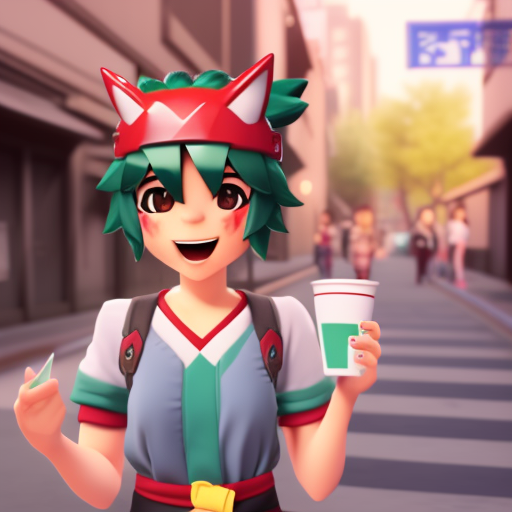

In [13]:
torch.manual_seed(0)
tune_lora_scale(pipe.unet, 0.7)
# tune_lora_scale(pipe.text_encoder, 0.7)
image = pipe(prompt, num_inference_steps=30, guidance_scale=7).images[0]
image # Bit better.

Now, that is

$$
W \leftarrow W + 0.7 A_1 B_1^T
$$
applied dynamically.
Anyways, let's try adding another lora onto it. We want to make it "illusty", so we will add an illustration LoRA.
So we will take the illustration lora $A_2$, $B_2$ and merge it with $A_1$, $B_1$ with $\alpha = 1.0$ and $\beta = 1.0$.
Then we will apply the merged model to the single model.
i.e.,

$$
W \leftarrow W + (A_1 + A_2)(B_1 + B_2)^T
$$

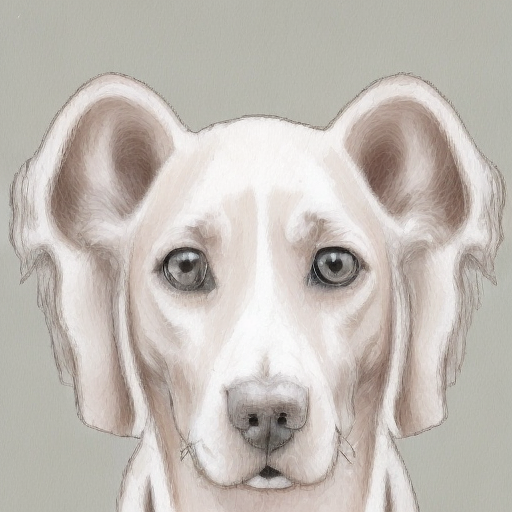

In [3]:
torch.manual_seed(0)

monkeypatch_add_lora(pipe.unet, torch.load("../training_scripts/sketch/lora_weight_e999_s4000.pt"), alpha=1.0, beta = 1.0)
tune_lora_scale(pipe.unet, 0.5)
tune_lora_scale(pipe.text_encoder, 0.5)

image = pipe(prompt, num_inference_steps=30, guidance_scale=7).images[0]
image

In [1]:
from diffusers import StableDiffusionPipeline, EulerAncestralDiscreteScheduler
import torch

model_id = "1art+0.5sketch"
# model_id = "stabilityai/stable-diffusion-2-1-base"

pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to(
    "cuda:1"
)
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)

prompt = "a dog."
torch.manual_seed(0)
image = pipe(prompt, num_inference_steps=30, guidance_scale=7).images[0]
image

# pipe.save_pretrained('1art+0.5sketch')

/home/zhang/anaconda3/envs/py39/lib/python3.9/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


ValueError: Cannot load <class 'diffusers.models.unet_2d_condition.UNet2DConditionModel'> from 1art+0.5sketch/unet because the following keys are missing: 
 down_blocks.1.attentions.0.transformer_blocks.0.ff.net.0.proj.bias, mid_block.attentions.0.transformer_blocks.0.attn1.to_out.0.weight, mid_block.attentions.0.transformer_blocks.0.attn1.to_q.weight, up_blocks.1.attentions.0.transformer_blocks.0.attn2.to_out.0.bias, up_blocks.2.attentions.2.transformer_blocks.0.attn2.to_k.weight, mid_block.attentions.0.transformer_blocks.0.ff.net.0.proj.bias, down_blocks.0.attentions.0.transformer_blocks.0.attn2.to_k.weight, down_blocks.2.attentions.0.transformer_blocks.0.attn1.to_q.weight, down_blocks.1.attentions.0.transformer_blocks.0.attn2.to_k.weight, up_blocks.3.attentions.1.transformer_blocks.0.attn2.to_q.weight, up_blocks.2.attentions.0.transformer_blocks.0.attn2.to_q.weight, down_blocks.0.attentions.1.transformer_blocks.0.attn1.to_out.0.bias, up_blocks.1.attentions.0.transformer_blocks.0.attn2.to_q.weight, up_blocks.2.attentions.0.transformer_blocks.0.attn2.to_v.weight, up_blocks.3.attentions.1.transformer_blocks.0.attn1.to_v.weight, down_blocks.1.attentions.1.transformer_blocks.0.attn2.to_q.weight, up_blocks.1.attentions.0.transformer_blocks.0.ff.net.0.proj.bias, down_blocks.0.attentions.1.transformer_blocks.0.attn2.to_k.weight, up_blocks.1.attentions.2.transformer_blocks.0.ff.net.0.proj.bias, up_blocks.2.attentions.1.transformer_blocks.0.attn1.to_out.0.weight, up_blocks.1.attentions.1.transformer_blocks.0.attn1.to_v.weight, up_blocks.2.attentions.0.transformer_blocks.0.attn2.to_out.0.weight, up_blocks.2.attentions.0.transformer_blocks.0.ff.net.0.proj.bias, up_blocks.3.attentions.2.transformer_blocks.0.attn1.to_v.weight, up_blocks.3.attentions.0.transformer_blocks.0.attn2.to_v.weight, down_blocks.2.attentions.1.transformer_blocks.0.attn2.to_q.weight, down_blocks.1.attentions.0.transformer_blocks.0.attn2.to_q.weight, up_blocks.2.attentions.1.transformer_blocks.0.attn2.to_v.weight, mid_block.attentions.0.transformer_blocks.0.attn2.to_q.weight, down_blocks.0.attentions.1.transformer_blocks.0.attn2.to_out.0.weight, down_blocks.2.attentions.1.transformer_blocks.0.attn1.to_k.weight, up_blocks.3.attentions.1.transformer_blocks.0.ff.net.0.proj.weight, down_blocks.2.attentions.0.transformer_blocks.0.attn2.to_out.0.bias, up_blocks.3.attentions.2.transformer_blocks.0.attn1.to_q.weight, up_blocks.2.attentions.2.transformer_blocks.0.attn1.to_v.weight, up_blocks.2.attentions.0.transformer_blocks.0.attn1.to_k.weight, down_blocks.0.attentions.1.transformer_blocks.0.attn1.to_q.weight, down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_out.0.weight, down_blocks.1.attentions.1.transformer_blocks.0.attn2.to_v.weight, up_blocks.1.attentions.1.transformer_blocks.0.attn1.to_out.0.weight, up_blocks.3.attentions.1.transformer_blocks.0.attn2.to_v.weight, down_blocks.2.attentions.0.transformer_blocks.0.attn2.to_out.0.weight, up_blocks.3.attentions.2.transformer_blocks.0.attn2.to_q.weight, down_blocks.0.attentions.0.transformer_blocks.0.attn2.to_v.weight, down_blocks.0.attentions.0.transformer_blocks.0.ff.net.0.proj.bias, up_blocks.3.attentions.2.transformer_blocks.0.attn2.to_out.0.bias, up_blocks.1.attentions.0.transformer_blocks.0.attn1.to_q.weight, up_blocks.2.attentions.2.transformer_blocks.0.attn2.to_q.weight, down_blocks.1.attentions.0.transformer_blocks.0.attn1.to_out.0.weight, up_blocks.2.attentions.1.transformer_blocks.0.attn2.to_out.0.bias, up_blocks.1.attentions.0.transformer_blocks.0.attn2.to_k.weight, up_blocks.3.attentions.2.transformer_blocks.0.attn2.to_k.weight, mid_block.attentions.0.transformer_blocks.0.attn2.to_v.weight, up_blocks.3.attentions.2.transformer_blocks.0.attn2.to_v.weight, down_blocks.2.attentions.1.transformer_blocks.0.attn1.to_out.0.weight, down_blocks.1.attentions.1.transformer_blocks.0.attn1.to_out.0.weight, up_blocks.1.attentions.1.transformer_blocks.0.attn2.to_out.0.weight, up_blocks.3.attentions.1.transformer_blocks.0.attn2.to_k.weight, mid_block.attentions.0.transformer_blocks.0.ff.net.0.proj.weight, up_blocks.1.attentions.2.transformer_blocks.0.ff.net.0.proj.weight, up_blocks.3.attentions.0.transformer_blocks.0.ff.net.0.proj.weight, up_blocks.3.attentions.0.transformer_blocks.0.attn2.to_k.weight, up_blocks.1.attentions.2.transformer_blocks.0.attn2.to_out.0.bias, up_blocks.3.attentions.0.transformer_blocks.0.attn1.to_out.0.bias, up_blocks.1.attentions.1.transformer_blocks.0.ff.net.0.proj.bias, up_blocks.2.attentions.2.transformer_blocks.0.attn2.to_out.0.weight, down_blocks.0.attentions.0.transformer_blocks.0.attn2.to_q.weight, down_blocks.2.attentions.0.transformer_blocks.0.attn1.to_out.0.weight, up_blocks.1.attentions.1.transformer_blocks.0.attn1.to_out.0.bias, up_blocks.2.attentions.1.transformer_blocks.0.attn2.to_q.weight, down_blocks.1.attentions.0.transformer_blocks.0.attn1.to_out.0.bias, up_blocks.2.attentions.1.transformer_blocks.0.ff.net.0.proj.weight, up_blocks.1.attentions.2.transformer_blocks.0.attn2.to_out.0.weight, up_blocks.3.attentions.0.transformer_blocks.0.attn2.to_q.weight, up_blocks.1.attentions.0.transformer_blocks.0.attn2.to_v.weight, down_blocks.0.attentions.1.transformer_blocks.0.attn2.to_out.0.bias, down_blocks.2.attentions.0.transformer_blocks.0.attn1.to_k.weight, up_blocks.3.attentions.2.transformer_blocks.0.attn1.to_out.0.weight, up_blocks.2.attentions.1.transformer_blocks.0.ff.net.0.proj.bias, up_blocks.2.attentions.2.transformer_blocks.0.attn1.to_q.weight, up_blocks.2.attentions.0.transformer_blocks.0.attn1.to_out.0.bias, mid_block.attentions.0.transformer_blocks.0.attn2.to_k.weight, up_blocks.2.attentions.2.transformer_blocks.0.attn2.to_v.weight, mid_block.attentions.0.transformer_blocks.0.attn1.to_k.weight, up_blocks.1.attentions.1.transformer_blocks.0.attn2.to_out.0.bias, up_blocks.1.attentions.1.transformer_blocks.0.attn1.to_k.weight, down_blocks.0.attentions.1.transformer_blocks.0.attn1.to_out.0.weight, up_blocks.2.attentions.1.transformer_blocks.0.attn1.to_q.weight, up_blocks.2.attentions.2.transformer_blocks.0.ff.net.0.proj.bias, down_blocks.2.attentions.0.transformer_blocks.0.attn1.to_v.weight, up_blocks.2.attentions.1.transformer_blocks.0.attn2.to_out.0.weight, up_blocks.2.attentions.0.transformer_blocks.0.attn1.to_out.0.weight, up_blocks.3.attentions.1.transformer_blocks.0.attn2.to_out.0.weight, up_blocks.3.attentions.2.transformer_blocks.0.attn2.to_out.0.weight, up_blocks.3.attentions.0.transformer_blocks.0.attn1.to_q.weight, down_blocks.2.attentions.0.transformer_blocks.0.attn1.to_out.0.bias, down_blocks.1.attentions.0.transformer_blocks.0.ff.net.0.proj.weight, up_blocks.1.attentions.1.transformer_blocks.0.attn1.to_q.weight, up_blocks.2.attentions.2.transformer_blocks.0.ff.net.0.proj.weight, down_blocks.1.attentions.0.transformer_blocks.0.attn1.to_q.weight, up_blocks.2.attentions.1.transformer_blocks.0.attn1.to_out.0.bias, up_blocks.1.attentions.2.transformer_blocks.0.attn1.to_q.weight, up_blocks.1.attentions.2.transformer_blocks.0.attn1.to_out.0.bias, up_blocks.2.attentions.2.transformer_blocks.0.attn1.to_k.weight, up_blocks.3.attentions.2.transformer_blocks.0.attn1.to_k.weight, down_blocks.1.attentions.0.transformer_blocks.0.attn2.to_out.0.weight, down_blocks.2.attentions.1.transformer_blocks.0.attn2.to_out.0.weight, up_blocks.1.attentions.0.transformer_blocks.0.attn1.to_v.weight, up_blocks.1.attentions.1.transformer_blocks.0.attn2.to_q.weight, down_blocks.2.attentions.0.transformer_blocks.0.attn2.to_k.weight, up_blocks.2.attentions.1.transformer_blocks.0.attn2.to_k.weight, up_blocks.3.attentions.1.transformer_blocks.0.attn1.to_out.0.bias, down_blocks.2.attentions.0.transformer_blocks.0.attn2.to_v.weight, down_blocks.1.attentions.1.transformer_blocks.0.attn2.to_out.0.weight, up_blocks.1.attentions.2.transformer_blocks.0.attn2.to_k.weight, up_blocks.3.attentions.0.transformer_blocks.0.attn2.to_out.0.weight, up_blocks.1.attentions.2.transformer_blocks.0.attn2.to_v.weight, mid_block.attentions.0.transformer_blocks.0.attn1.to_v.weight, down_blocks.1.attentions.0.transformer_blocks.0.attn1.to_v.weight, up_blocks.2.attentions.2.transformer_blocks.0.attn1.to_out.0.bias, down_blocks.2.attentions.0.transformer_blocks.0.ff.net.0.proj.weight, down_blocks.0.attentions.0.transformer_blocks.0.ff.net.0.proj.weight, down_blocks.1.attentions.1.transformer_blocks.0.attn1.to_out.0.bias, mid_block.attentions.0.transformer_blocks.0.attn1.to_out.0.bias, up_blocks.2.attentions.1.transformer_blocks.0.attn1.to_k.weight, up_blocks.3.attentions.0.transformer_blocks.0.attn2.to_out.0.bias, down_blocks.1.attentions.1.transformer_blocks.0.attn2.to_out.0.bias, down_blocks.2.attentions.0.transformer_blocks.0.ff.net.0.proj.bias, down_blocks.1.attentions.1.transformer_blocks.0.attn1.to_k.weight, up_blocks.3.attentions.0.transformer_blocks.0.attn1.to_out.0.weight, up_blocks.1.attentions.2.transformer_blocks.0.attn1.to_out.0.weight, down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_v.weight, down_blocks.1.attentions.1.transformer_blocks.0.attn1.to_v.weight, down_blocks.2.attentions.0.transformer_blocks.0.attn2.to_q.weight, down_blocks.2.attentions.1.transformer_blocks.0.attn1.to_q.weight, up_blocks.1.attentions.0.transformer_blocks.0.ff.net.0.proj.weight, up_blocks.1.attentions.0.transformer_blocks.0.attn2.to_out.0.weight, down_blocks.0.attentions.0.transformer_blocks.0.attn2.to_out.0.bias, up_blocks.1.attentions.2.transformer_blocks.0.attn2.to_q.weight, mid_block.attentions.0.transformer_blocks.0.attn2.to_out.0.bias, down_blocks.2.attentions.1.transformer_blocks.0.attn2.to_v.weight, down_blocks.2.attentions.1.transformer_blocks.0.attn1.to_v.weight, down_blocks.0.attentions.1.transformer_blocks.0.ff.net.0.proj.bias, down_blocks.2.attentions.1.transformer_blocks.0.ff.net.0.proj.bias, up_blocks.3.attentions.1.transformer_blocks.0.attn1.to_out.0.weight, up_blocks.1.attentions.0.transformer_blocks.0.attn1.to_out.0.weight, up_blocks.3.attentions.2.transformer_blocks.0.ff.net.0.proj.weight, up_blocks.2.attentions.0.transformer_blocks.0.attn1.to_q.weight, up_blocks.2.attentions.0.transformer_blocks.0.attn2.to_k.weight, up_blocks.1.attentions.1.transformer_blocks.0.attn2.to_k.weight, up_blocks.3.attentions.0.transformer_blocks.0.attn1.to_v.weight, up_blocks.2.attentions.1.transformer_blocks.0.attn1.to_v.weight, down_blocks.2.attentions.1.transformer_blocks.0.ff.net.0.proj.weight, down_blocks.1.attentions.1.transformer_blocks.0.ff.net.0.proj.bias, down_blocks.1.attentions.0.transformer_blocks.0.attn2.to_out.0.bias, mid_block.attentions.0.transformer_blocks.0.attn2.to_out.0.weight, up_blocks.1.attentions.0.transformer_blocks.0.attn1.to_out.0.bias, down_blocks.1.attentions.1.transformer_blocks.0.ff.net.0.proj.weight, up_blocks.2.attentions.0.transformer_blocks.0.ff.net.0.proj.weight, up_blocks.3.attentions.2.transformer_blocks.0.attn1.to_out.0.bias, down_blocks.0.attentions.1.transformer_blocks.0.attn2.to_v.weight, up_blocks.2.attentions.0.transformer_blocks.0.attn2.to_out.0.bias, up_blocks.3.attentions.2.transformer_blocks.0.ff.net.0.proj.bias, down_blocks.0.attentions.1.transformer_blocks.0.attn1.to_v.weight, up_blocks.1.attentions.1.transformer_blocks.0.ff.net.0.proj.weight, up_blocks.1.attentions.2.transformer_blocks.0.attn1.to_k.weight, down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_out.0.bias, down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_q.weight, up_blocks.3.attentions.1.transformer_blocks.0.attn1.to_q.weight, up_blocks.1.attentions.1.transformer_blocks.0.attn2.to_v.weight, down_blocks.0.attentions.1.transformer_blocks.0.ff.net.0.proj.weight, up_blocks.3.attentions.0.transformer_blocks.0.ff.net.0.proj.bias, up_blocks.2.attentions.0.transformer_blocks.0.attn1.to_v.weight, down_blocks.0.attentions.1.transformer_blocks.0.attn2.to_q.weight, up_blocks.3.attentions.1.transformer_blocks.0.attn2.to_out.0.bias, up_blocks.2.attentions.2.transformer_blocks.0.attn1.to_out.0.weight, up_blocks.1.attentions.0.transformer_blocks.0.attn1.to_k.weight, down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_k.weight, down_blocks.2.attentions.1.transformer_blocks.0.attn2.to_out.0.bias, down_blocks.1.attentions.0.transformer_blocks.0.attn2.to_v.weight, down_blocks.0.attentions.0.transformer_blocks.0.attn2.to_out.0.weight, down_blocks.1.attentions.0.transformer_blocks.0.attn1.to_k.weight, up_blocks.1.attentions.2.transformer_blocks.0.attn1.to_v.weight, up_blocks.3.attentions.1.transformer_blocks.0.attn1.to_k.weight, up_blocks.2.attentions.2.transformer_blocks.0.attn2.to_out.0.bias, up_blocks.3.attentions.0.transformer_blocks.0.attn1.to_k.weight, down_blocks.0.attentions.1.transformer_blocks.0.attn1.to_k.weight, down_blocks.1.attentions.1.transformer_blocks.0.attn2.to_k.weight, down_blocks.2.attentions.1.transformer_blocks.0.attn2.to_k.weight, down_blocks.1.attentions.1.transformer_blocks.0.attn1.to_q.weight, up_blocks.3.attentions.1.transformer_blocks.0.ff.net.0.proj.bias, down_blocks.2.attentions.1.transformer_blocks.0.attn1.to_out.0.bias. 
 Please make sure to pass `low_cpu_mem_usage=False` and `device_map=None` if you want to randomely initialize those weights or else make sure your checkpoint file is correct.

Now since that is overfitted again, we will tone down a bit, once more.

  0%|          | 0/30 [00:00<?, ?it/s]

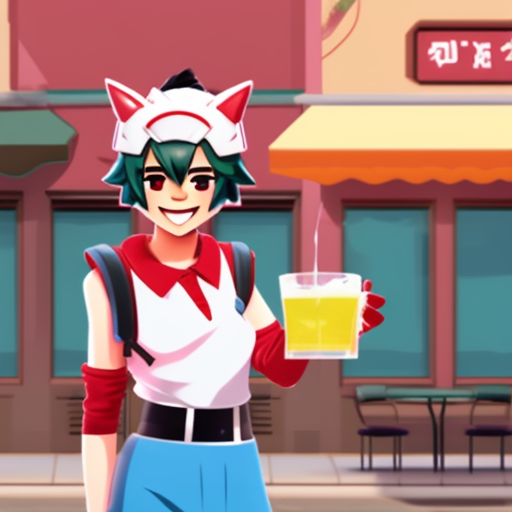

In [15]:
torch.manual_seed(0)
tune_lora_scale(pipe.unet, 0.5)
tune_lora_scale(pipe.text_encoder, 0.5)

image = pipe(prompt, num_inference_steps=30, guidance_scale=7).images[0]
image

So that is both "illustration-like" and "Kiriko-like".
Since we've only merged Unet Lora, above result is:

$$
W_{unet} \leftarrow W_{unet} + 0.5 (A_{kiriko} + A_{illust})(B_{kiriko} + B_{illust})^T
$$

and

$$
W_{clip} \leftarrow W_{clip} + 0.5 A_{kiriko}B_{kiriko}^T
$$

In [16]:
image.save("../contents/lora_with_clip_and_illust.jpg")